In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb



## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading


## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
df_interest = pd.read_csv('data/data_set.csv')
df_interest.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [23]:
df_interest[['fico_low', 'fico_high']] = df_interest['fico_range'].str.split('-', expand=True).astype(int)

In [24]:
df_interest['percent_unfunded'] =  1 - (df_interest['amount_funded_by_investors'] / df_interest['amount_requested'])
df_interest['fico_average'] = (df_interest['fico_high'] + df_interest['fico_low']) / 2
df_interest

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,percent_unfunded,fico_average
0,8.90,735-739,20000.0,20000.00,36.0,735,739,0.000000,737.0
1,12.12,715-719,19200.0,19200.00,36.0,715,719,0.000000,717.0
2,21.98,690-694,35000.0,35000.00,60.0,690,694,0.000000,692.0
3,9.99,695-699,10000.0,9975.00,36.0,695,699,0.002500,697.0
4,11.71,695-699,12000.0,12000.00,36.0,695,699,0.000000,697.0
...,...,...,...,...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0,705,709,0.001667,707.0
2494,14.09,740-744,16000.0,16000.00,60.0,740,744,0.000000,742.0
2495,13.99,680-684,10000.0,10000.00,36.0,680,684,0.000000,682.0
2496,12.42,675-679,6000.0,6000.00,36.0,675,679,0.000000,677.0


In [ ]:
length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'amount_funded_by_investors'], axis=1)

length_interest

,interest_rate,amount_requested,loan_length,percent_unfunded,fico_average
0,8.90,20000.0,36.0,0.000000,737.0
1,12.12,19200.0,36.0,0.000000,717.0
2,21.98,35000.0,60.0,0.000000,692.0
3,9.99,10000.0,36.0,0.002500,697.0
4,11.71,12000.0,36.0,0.000000,697.0
...,...,...,...,...,...
2493,16.77,30000.0,60.0,0.001667,707.0
2494,14.09,16000.0,60.0,0.000000,742.0
2495,13.99,10000.0,36.0,0.000000,682.0
2496,12.42,6000.0,36.0,0.000000,677.0


In [25]:
no_length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'loan_length', 'amount_funded_by_investors'], axis=1)

no_length_interest

,interest_rate,amount_requested,percent_unfunded,fico_average
0,8.90,20000.0,0.000000,737.0
1,12.12,19200.0,0.000000,717.0
2,21.98,35000.0,0.000000,692.0
3,9.99,10000.0,0.002500,697.0
4,11.71,12000.0,0.000000,697.0
...,...,...,...,...
2493,16.77,30000.0,0.001667,707.0
2494,14.09,16000.0,0.000000,742.0
2495,13.99,10000.0,0.000000,682.0
2496,12.42,6000.0,0.000000,677.0


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

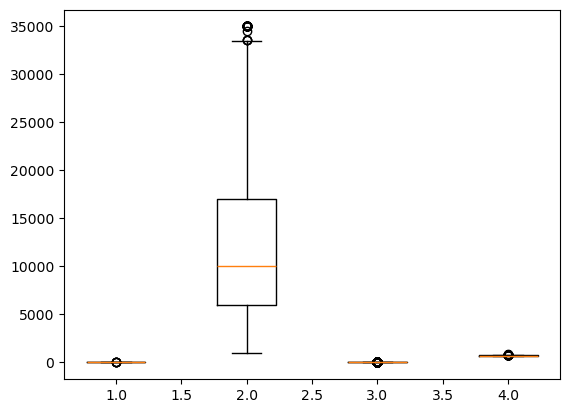

In [35]:
plt.boxplot(no_length_interest, label=no_length_interest.columns);

In [29]:
scaler = MinMaxScaler()

scaled_no_length = pd.DataFrame(scaler.fit_transform(no_length_interest), columns=no_length_interest[['amount_requested','percent_unfunded','fico_average']])
scaled_no_length

ValueError: Index data must be 1-dimensional

In [27]:
# Clean Data before this step
# X = df_clean_interest[['amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_low', 'fico_high']]
# y = df_clean_interest['interest_rate']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)